In [41]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [42]:
df = pd.read_csv('tvmarketing.csv')
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [44]:
X = df.iloc[:,:-1]  # [:,:-1] [Select all rows , select all column except Sales column]
X

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [45]:
y = df.iloc[:,-1]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [47]:
X_train.index

Index([ 79, 197,  38,  24, 122, 195,  29,  19, 143,  86,
       ...
       121, 199,  20, 188,  71, 106,  14,  92, 179, 102],
      dtype='int64', length=160)

In [48]:
# import Linear Regression

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [49]:
print(f'The Coeficient of regression is : {LR.coef_}')

The Coeficient of regression is : [0.04652973]


In [50]:
print (f'The Intercept of the regression is : {LR.intercept_}')

The Intercept of the regression is : 7.119638430592953


In [51]:
print ( f'The equation of the prediction is {LR.coef_[0]} + {LR.intercept_} * TV')

The equation of the prediction is 0.046529733705443346 + 7.119638430592953 * TV


In [52]:
y_pred = LR.predict(X_test)

In [54]:
print(y_pred[:5])
print(y_test.values[:5])

[14.71794394 16.2115484  20.74819743  7.66403631 17.37013877]
[16.9 22.4 21.4  7.3 24.7]


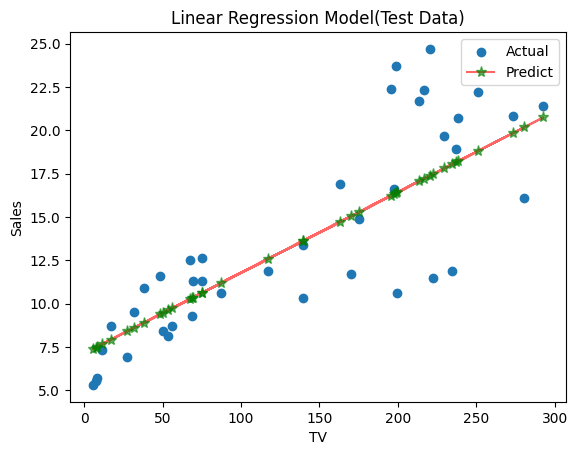

In [65]:
## visualize the prediction

plt.scatter(X_test, y_test , label = 'Actual')
plt.plot(X_test, y_pred, color = 'red',label ='Predict', marker = '*', mfc = 'green', ms =8, mec='green',alpha = 0.6)

plt.legend()
plt.title('Linear Regression Model(Test Data)')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

In [66]:
y_train_pred = LR.predict(X_train)

In [69]:
from sklearn.metrics import mean_squared_error

In [71]:
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_pred)
print( f'Train MSE: {mse_train:.4f}')
print (f'Test MSE: {mse_test:.4f}')

Train MSE: 10.6036
Test MSE: 10.2047
